In [1]:
#to do: align sets, fix position of second set
#code out other 2 cases + base triangle


#The centroid of the largest point is 0,0. 

#how are my points being defined by this rotation matrix


import matplotlib.pyplot as plt
import numpy as np



delta=2/3




def new_tri(theta, vertices, prog_rate, length):
    """
    Calculates the new length for the next triangle based on the current orientation and progression rate.
    
    Args:
        theta (float): Current orientation of the triangle in radians.
        vertices (list): Vertices of the current triangle.
        prog_rate (float): Progression rate in radians.
        length (float): Side length of the current triangle.
    
    Returns:
        float: New length for the next triangle.
    """
    # Assuming the function's purpose is to adjust the triangle size based on rotation,
    # this implementation will be simplified to focus on adjusting the length directly.
    
    # For simplicity, let's assume each new triangle is scaled down by a factor related to prog_rate
    # This is a placeholder for actual logic which might involve complex calculations
    A=2*(1-0.75*(1/np.sin(prog_rate))**2)
    scale_factor = (np.sqrt(3)/(2*np.sin(prog_rate)))*(1-(A/(-1*np.sqrt(1-2*A)+A+1)))  # Simplified scaling factor
    new_length = length * scale_factor
    
    return new_length

def triangles(centroid, theta, progression, size, iter_num, prog_rate):
    """
    Generates data for a sequence of triangles, each rotated and possibly resized based on the progression rate.
    
    Args:
        centroid (list): Centroid of the initial triangle.
        theta (float): Orientation of the initial triangle in radians.
        progression (str): 'clockwise' or 'counterclockwise' progression.
        size (float): Side length of the initial triangle.
        iter_num (int): Number of triangles to generate.
        prog_rate (float): Rotation increment for each triangle in radians.
    
    
    Returns:
        np.array: Array containing vertices for all triangles.
    """
    
    
    data = np.zeros([iter_num, 4, 2])  # Adjusted to include the closing point for each triangle
    
    #the scale is the component of size that translates to the points 
    #creating a triangle of side length size
    
    scale=(1/np.sqrt(3))
    
    # Initial vertices calculation based on the provided centroid, size, and theta
    for i in range(iter_num):
        for j in range(3):
            angle = theta + j * np.pi * 2 / 3  # Equilateral triangle angles
            data[i, j] = [
                centroid[0] + np.cos(angle) * size*scale,
                centroid[1] + np.sin(angle) * size*scale
            ]
        data[i, 3] = data[i, 0]  # Closing the triangle loop
        
        theta += prog_rate  # Adjust theta for the next triangle
        size = new_tri(theta, data[i], prog_rate, size)  # Adjust size for the next triangle
    

    
    return data

def start_points(l_0, start, rotation):
    """
    find the points of the triangle pattern that I drew-equilateral triangles
    finding them by thinking about coordinate grid as having been rotated

    Args:
        theta (radians (float)): clockwise rotation of cartesian coordinate plane about z axis
        l_0 (float): length of prior triangle side
        start (list or array): start point (furthest left point), of iteration
        
        
        start is 0,0 in rotated space
    """
    theta=rotation

    #rotation matrix for clockwise theta progression
    #this function by default uses clockwise progresssion for the 
    #assignment of triangle positions 
    
    rot_matrix=np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
    inv_matrix=np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])

    start_prime=np.dot(start, rot_matrix)

    delta=2/3
    centroids=[list(np.dot([start_prime[0]+0.5*(delta)*l_0, start_prime[1]+l_0*delta*((0.5/(np.sqrt(3))))],inv_matrix))+[0],
               list(np.dot([start_prime[0]+delta*l_0, start_prime[1]+l_0*delta*(1/np.sqrt(3))],inv_matrix))+[np.pi/3],
               list(np.dot([start_prime[0]+l_0,start_prime[1]+l_0*delta*((0.5/(np.sqrt(3))))],inv_matrix))+[0]]

    return centroids



In [2]:
iter_num=100
prog_rate=np.radians(1.1)
progression='counterclockwise'

In [3]:
#start from the basics, translating one point correctly

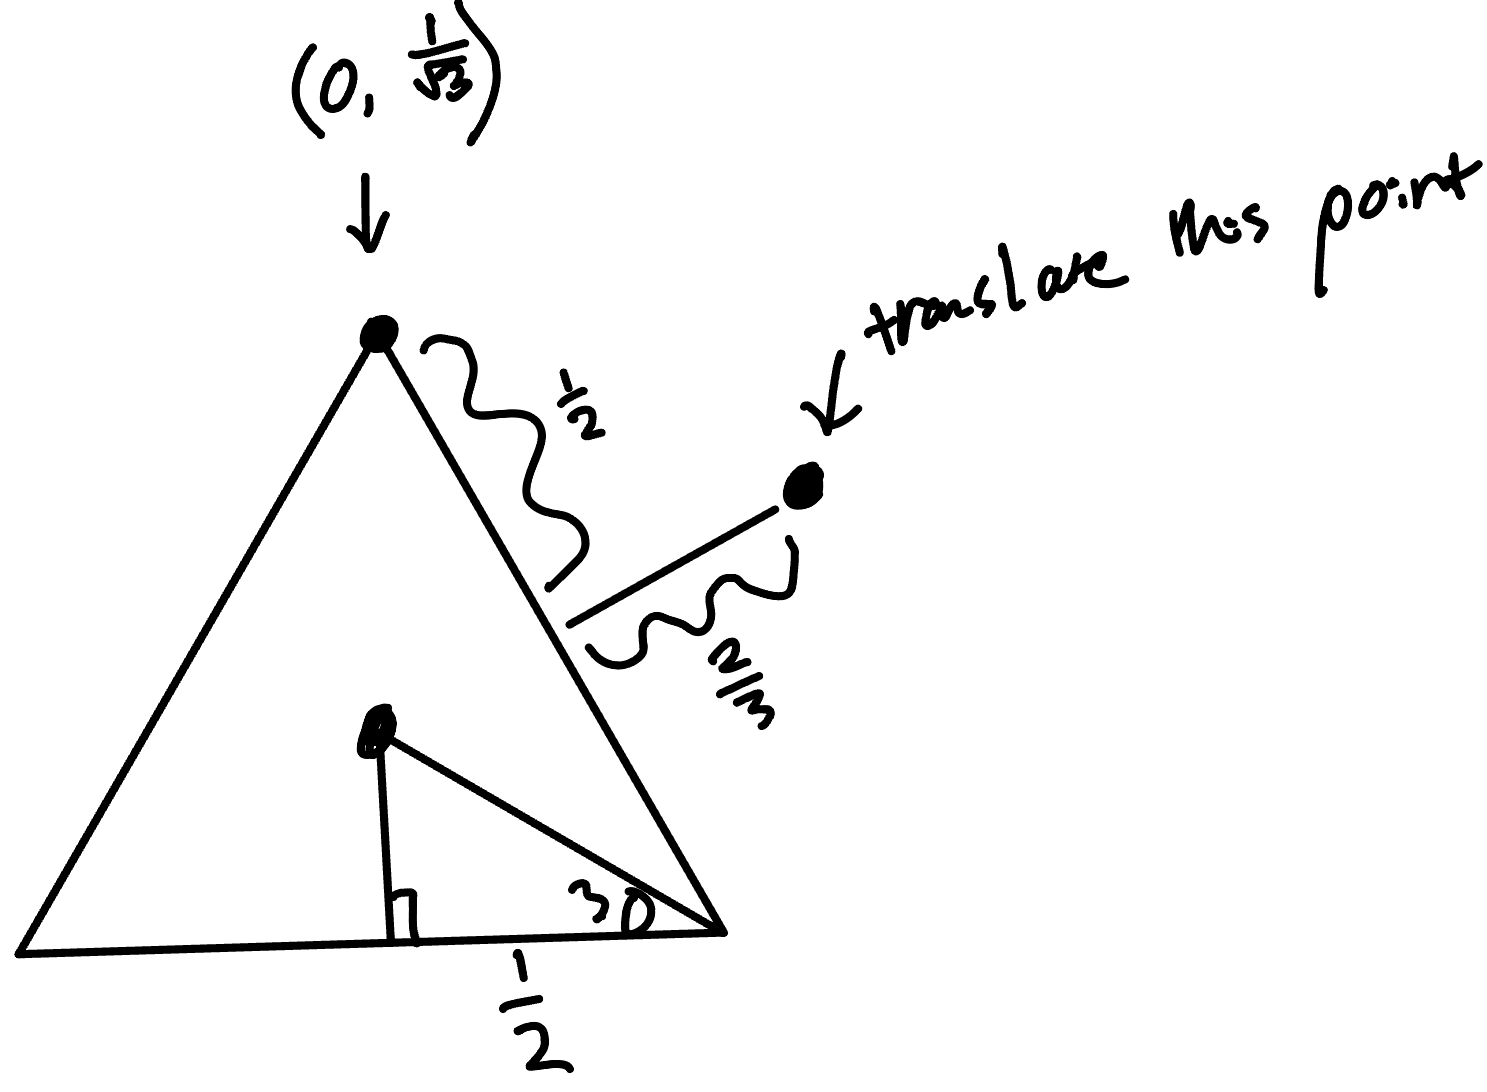

In [4]:
start=[0,1/np.sqrt(3)]

theta=np.pi/3
rot_matrix=np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
inv_matrix=np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])

start_prime=np.dot(start,rot_matrix)

point=[start_prime[0]+0.5, start_prime[1]+2/3]

rpoint=np.dot(point, inv_matrix)
rpoint

#correct!!!


array([0.82735027, 0.4776709 ])

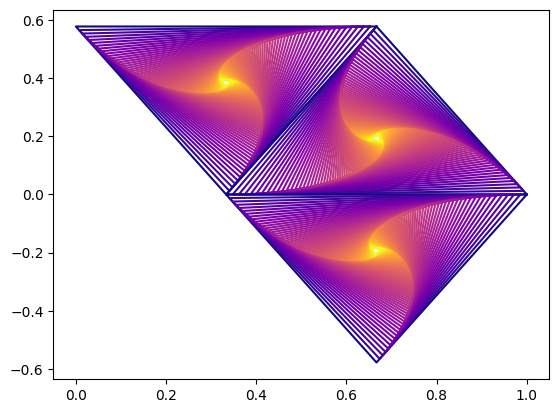

In [5]:
####################################################################################################################################
#FIRST SET-data1
####################################################################################################################################

start=[0,1/np.sqrt(3)]

rotation=np.pi/3


parameters=start_points(1,[0,1/np.sqrt(3)], rotation)



x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data1=[]
for point in range(3):
    data1+=[triangles(centroid=[x[point], y[point]], theta=np.pi/6+parameters[point][-1], size=delta, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data1[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!



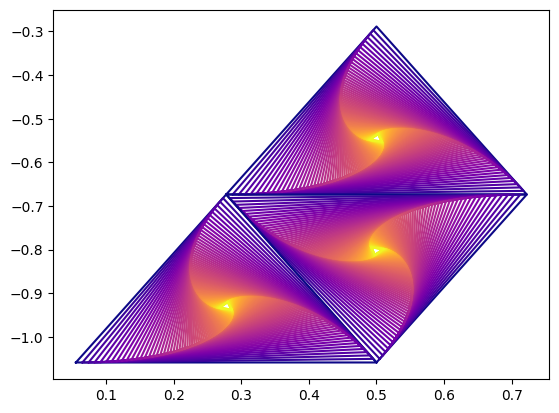

In [6]:
####################################################################################################################################
#Second SET
####################################################################################################################################

start=[(1/np.sqrt(3))*(np.sqrt(3)/2),-(1/np.sqrt(3))*1/2]

rotation=2*np.pi/3


parameters=start_points(delta,start,rotation)



x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data2=[]
for point in range(3):
    data2+=[triangles(centroid=[x[point], y[point]], theta=-5*np.pi/6+parameters[point][-1], size=delta**2, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data2[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

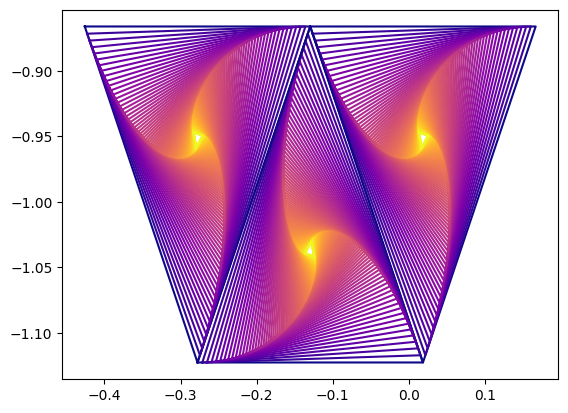

In [7]:
####################################################################################################################################
#Third SET
####################################################################################################################################

#Size? (xcoord)

start=[0.25*delta,-1*(0.5*(1/np.sqrt(3))+delta*(np.sqrt(3)/2))]

rotation=np.pi


parameters=start_points(delta**2,start,rotation)



x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data3=[]
for point in range(3):
    data3+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta**3, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data3[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))


#Correct!!!

In [8]:
#Now, we need to do the other two.

In [9]:
#Set zero (center triangle)
data0=[]
data0+=[triangles(centroid=[0,0], theta=-5*np.pi/6, progression=progression, size=1, iter_num=iter_num, prog_rate=prog_rate)]


In [10]:
#start_points=[[-0.5, -0.5*(1/np.sqrt(3))], [0, 1/np.sqrt(3)], [delta, 1/np.sqrt(3)]]

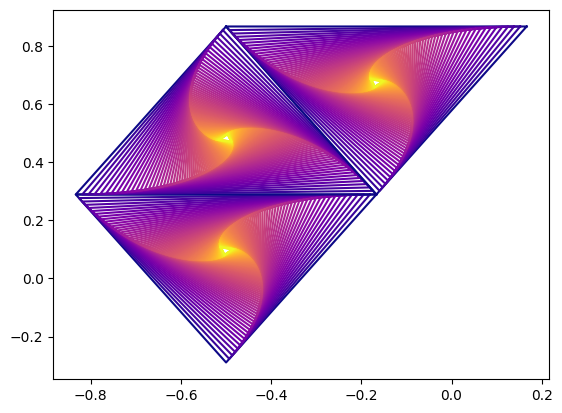

In [11]:
####################################################################################################################################
#FIRST SET-data4
####################################################################################################################################

start=[-0.5, -0.5*(1/np.sqrt(3))]

rotation=5*np.pi/3


parameters=start_points(1,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data4=[]
for point in range(3):
    data4+=[triangles(centroid=[x[point], y[point]], theta=np.pi/6+parameters[point][-1], size=delta, iter_num=iter_num, prog_rate=prog_rate, progression='clockwise')]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data4[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

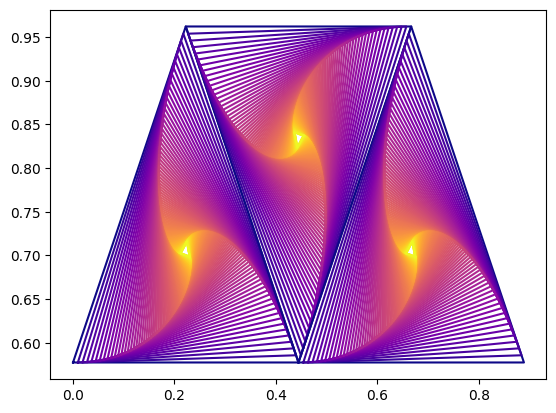

In [12]:
####################################################################################################################################
#Second SET-data5
####################################################################################################################################

start=[0, 1/np.sqrt(3)]

rotation=2*np.pi


parameters=start_points(delta,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data5=[]
for point in range(3):
    data5+=[triangles(centroid=[x[point], y[point]], theta=-5*np.pi/6+parameters[point][-1], size=delta**2, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data5[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

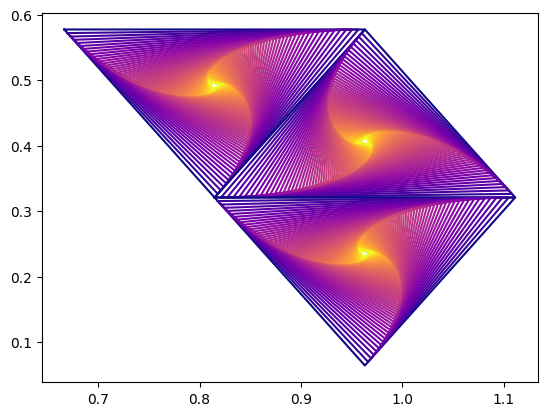

In [13]:
####################################################################################################################################
#Second SET-data6
####################################################################################################################################

start=[delta, 1/np.sqrt(3)]

rotation=np.pi/3


parameters=start_points(delta**2,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data6=[]
for point in range(3):
    data6+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta**3, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data6[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

In [14]:
#Now, for the third set
#start_points=[[0.5, -0.5*(1/np.sqrt(3))],[-0.5,-0.5*(1/np.sqrt(3))],[-5/6, 0.5*(1/np.sqrt(3))]]

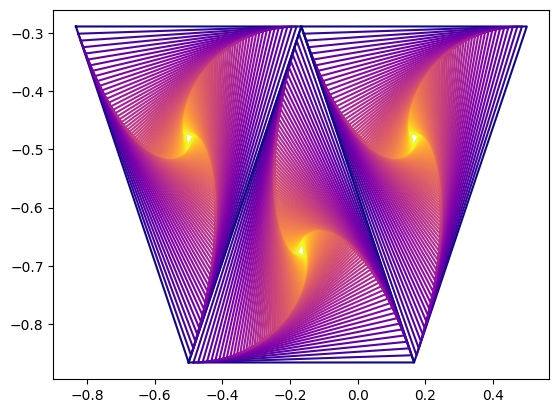

In [15]:

####################################################################################################################################
#FIRST SET-data7
####################################################################################################################################

start=[0.5, -0.5*(1/np.sqrt(3))]

rotation=np.pi


parameters=start_points(1,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data7=[]
for point in range(3):
    data7+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data7[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

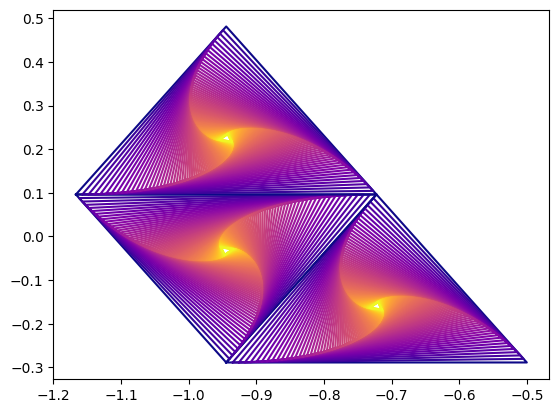

In [16]:

####################################################################################################################################
#SECOND SET-data8
####################################################################################################################################

start=[-0.5,-0.5*(1/np.sqrt(3))]

rotation=4*np.pi/3


parameters=start_points(delta,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data8=[]
for point in range(3):
    data8+=[triangles(centroid=[x[point], y[point]], theta=-5*np.pi/6+parameters[point][-1], size=delta**2, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data8[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

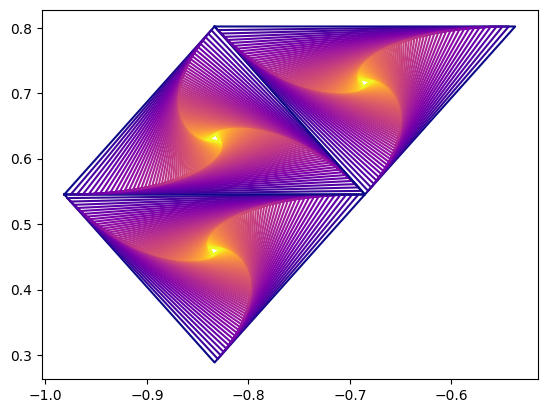

In [17]:

####################################################################################################################################
#Third SET-data9
####################################################################################################################################

start=[-5/6, 0.5*(1/np.sqrt(3))]

rotation=5*np.pi/3


parameters=start_points(delta**2,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data9=[]
for point in range(3):
    data9+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta**3, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    
colormap = plt.get_cmap('plasma')

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data9[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)))

#Correct!!!

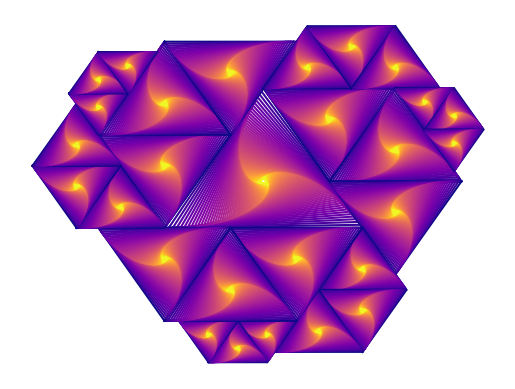

In [18]:
#Putting it together
linewid=1.5

for i in range(iter_num):
    x, y = zip(*data0[0][i])
    plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)


#set 1:



for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data1[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)



#delta

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data2[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)




#delta**2:

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data3[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)


        
#set 2

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data4[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)
        
        
        
for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data5[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)
        
        
        
        
for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data6[triang][i])
        
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)
        

        
        
        
#set 3

for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data7[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)
        
        
        
for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data8[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)
        
        
        
        
for triang in range(3):
    for i in range(iter_num):
        x, y = zip(*data9[triang][i])
        plt.plot(x, y, color=colormap(i**(0.55) / iter_num**(0.55)),linewidth=linewid)

plt.axis('off')
plt.savefig('/Users/henryschnieders/desktop/completion2.png', dpi=900)
#Yayyyyyyyyyy!!!!


In [19]:
##1
start=[0,1/np.sqrt(3)]

rotation=np.pi/3


parameters=start_points(1,[0,1/np.sqrt(3)], rotation)



x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data1=[]
for point in range(3):
    data1+=[triangles(centroid=[x[point], y[point]], theta=np.pi/6+parameters[point][-1], size=delta, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    

In [20]:
##2

start=[(1/np.sqrt(3))*(np.sqrt(3)/2),-(1/np.sqrt(3))*1/2]

rotation=2*np.pi/3


parameters=start_points(delta,start,rotation)



x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data2=[]
for point in range(3):
    data2+=[triangles(centroid=[x[point], y[point]], theta=-5*np.pi/6+parameters[point][-1], size=delta**2, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    

In [21]:
##3

start=[0.25*delta,-1*(0.5*(1/np.sqrt(3))+delta*(np.sqrt(3)/2))]

rotation=np.pi


parameters=start_points(delta**2,start,rotation)



x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data3=[]
for point in range(3):
    data3+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta**3, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    

In [22]:
##4
start=[-0.5, -0.5*(1/np.sqrt(3))]

rotation=5*np.pi/3


parameters=start_points(1,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data4=[]
for point in range(3):
    data4+=[triangles(centroid=[x[point], y[point]], theta=np.pi/6+parameters[point][-1], size=delta, iter_num=iter_num, prog_rate=prog_rate, progression='clockwise')]
    

In [23]:
##5
start=[0, 1/np.sqrt(3)]

rotation=2*np.pi


parameters=start_points(delta,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data5=[]
for point in range(3):
    data5+=[triangles(centroid=[x[point], y[point]], theta=-5*np.pi/6+parameters[point][-1], size=delta**2, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    

In [24]:
##6
start=[delta, 1/np.sqrt(3)]

rotation=np.pi/3


parameters=start_points(delta**2,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data6=[]
for point in range(3):
    data6+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta**3, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    

In [25]:
##7
start=[0.5, -0.5*(1/np.sqrt(3))]

rotation=np.pi


parameters=start_points(1,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data7=[]
for point in range(3):
    data7+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    

In [26]:
##8
start=[-0.5,-0.5*(1/np.sqrt(3))]

rotation=4*np.pi/3


parameters=start_points(delta,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data8=[]
for point in range(3):
    data8+=[triangles(centroid=[x[point], y[point]], theta=-5*np.pi/6+parameters[point][-1], size=delta**2, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
  





In [27]:
##9
start=[-5/6, 0.5*(1/np.sqrt(3))]

rotation=5*np.pi/3


parameters=start_points(delta**2,start,rotation)

x=[para[0] for para in parameters]
y=[para[1] for para in parameters]


data9=[]
for point in range(3):
    data9+=[triangles(centroid=[x[point], y[point]], theta=5*np.pi/6+parameters[point][-1], size=delta**3, iter_num=iter_num, prog_rate=prog_rate, progression=progression)]
    


In [28]:
iter_num=675
prog_rate=np.radians(0.3)
progression='counterclockwise'

In [29]:
#biggest to smallest-all data for every triangle

start=[[[0,1/np.sqrt(3)],[-0.5, -0.5*(1/np.sqrt(3))],[0.5, -0.5*(1/np.sqrt(3))]],[[(1/np.sqrt(3))*(np.sqrt(3)/2),-(1/np.sqrt(3))*1/2],[0, 1/np.sqrt(3)],[-0.5,-0.5*(1/np.sqrt(3))]], [[0.25*delta,-1*(0.5*(1/np.sqrt(3))+delta*(np.sqrt(3)/2))],[delta, 1/np.sqrt(3)],[-5/6, 0.5*(1/np.sqrt(3))]]]

rotation=[[[np.pi/3],[5*np.pi/3], [np.pi]], [[2*np.pi/3],[2*np.pi],[4*np.pi/3]],[[np.pi],[np.pi/3],[5*np.pi/3]]]

sizes=[1,delta,delta**2]


In [30]:
data0=[]
data0+=[triangles(centroid=[0,0], theta=-5*np.pi/6, progression=progression, size=1, iter_num=iter_num, prog_rate=prog_rate*0.8)]


In [31]:
def assign_data(iter_num, prog_rate):

    for siz in range(1,4,1):
        for obj in range(3):

            
            parameters=start_points(sizes[siz-1],start[siz-1][obj],rotation[siz-1][obj][0])
            
            x=[para[0] for para in parameters]
            y=[para[1] for para in parameters]
            
            globals()[f'data{siz+3*obj}']=[]
            
            for tri in range(3):
                    
                if siz==2:
                    thetaa=-5*np.pi/6
                    
                else:
                    thetaa=5*np.pi/6
                    
                thetaaa=((-1)**tri)*thetaa+parameters[tri][-1]
            
                
                globals()[f'data{siz+3*obj}']+=[triangles(centroid=[x[tri], y[tri]], theta=((-1)**tri)*thetaa, size=sizes[siz-1]*delta, iter_num=int(iter_num+0.75*(3-siz)**1.005), prog_rate=prog_rate, progression=progression)]

    return "data has been assigned."

assign_data(iter_num, prog_rate)        
            
            

'data has been assigned.'

In [32]:

#color=colormap((np.fabs(i-((dset/9)*iter_num)) / iter_num))

#color=colormap((np.fabs(i-(dset%3+0.25*(dset))/(17/4))))
colormap = plt.get_cmap('plasma')
    
def triang_plot(linewid):

    import matplotlib
    matplotlib.use('AGG')
    plt.style.use('dark_background')
    
    
    for i in range(iter_num):
        x, y = zip(*data0[0][i])
        plt.plot(x, y, color=colormap(0.925-(0.00105-0.0005*((1/((0.75)+1))))*i),linewidth=linewid)
        
        
    for dset in range(1,10,1):
        
        scale=(3-(dset%3+2*((dset%3)%2)))
        
        for triang in range(3):
            for i in range(iter_num):
                
                x, y = zip(*globals()[f'data{dset}'][triang][i])
                
                plt.plot(x, y,color=colormap((0.895-0.045*triang-(0.00105-0.0005*((1/((scale)+1))))*i-0.08*scale)),linewidth=linewid)
                
                
    plt.axis('off')
    return "Plotting completed"
        
    
triang_plot(0.475)
plt.savefig('/Users/henryschnieders/desktop/wow6.png', transparent=True, dpi=1200)

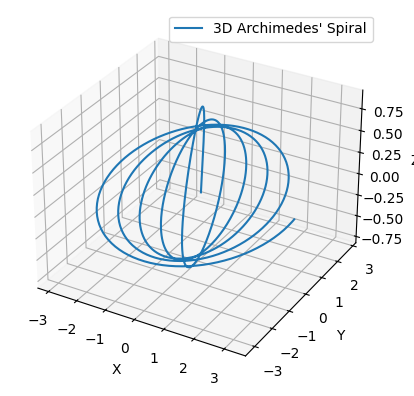

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the spiral
a = 0.1
b = 0.1
c = 20
theta_max = 10 * np.pi  # Maximum theta value for the spiral
num_points = 1000       # Number of points in the spiral

# Generate theta values
theta = np.linspace(0, theta_max, num_points)

# Calculate the 3D coordinates of the spiral
x = (a + b * theta) * np.cos(theta)
y = (a + b * theta) * np.sin(theta)
z = np.sin(theta) * np.exp(-theta / c)

# Plot the 3D spiral
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='3D Archimedes\' Spiral')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
